[ 0.  1.  2.  3.  4.  5.]


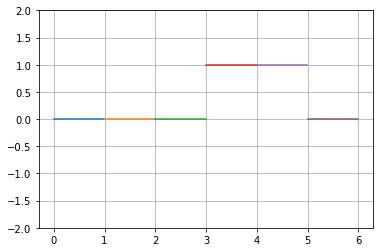

In [29]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
l = [0, 0, 0, 1, 1, 0]
l = np.asarray(l,dtype=np.float)
f = 500
#print (1/500)
t = np.arange(0.0, 6.0, 1/500)
print (t[0::500])
#t[0:500] = np.pi/2
#t = np.linspace(0, 1, 500, endpoint=False)
for i in range(len(l)):
    #print (i * f, (i+1) *f )
    """if (l[i] == 1):
        print (i * f, (i+1) *f )"""
        #t[i * f:(i+1) * f] = np.pi
        #plt.plot(t[i * f:(i+1) * f] ,signal.square(t[i * f:(i+1) * f]  *np.pi ))
    #else:
    plt.plot(t[i * f:(i+1) * f], 0 * signal.square(t[i * f:(i+1) * f]  *np.pi ) + l[i])
#for i in range(len(l)):
#plt.plot(t ,0* signal.square(t *np.pi )+1.5)
#print(0.1  *np.pi)

plt.grid(axis='both')
plt.ylim(-2, 2)
plt.show()

0.05
(120,)
[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.    1.05  1.1   1.15
  1.2   1.25  1.3   1.35  1.4   1.45  1.5   1.55  1.6   1.65  1.7   1.75
  1.8   1.85  1.9   1.95  2.    2.05  2.1   2.15  2.2   2.25  2.3   2.35
  2.4   2.45  2.5   2.55  2.6   2.65  2.7   2.75  2.8   2.85  2.9   2.95
  3.    3.05  3.1   3.15  3.2   3.25  3.3   3.35  3.4   3.45  3.5   3.55
  3.6   3.65  3.7   3.75  3.8   3.85  3.9   3.95  4.    4.05  4.1   4.15
  4.2   4.25  4.3   4.35  4.4   4.45  4.5   4.55  4.6   4.65  4.7   4.75
  4.8   4.85  4.9   4.95  5.    5.05  5.1   5.15  5.2   5.25  5.3   5.35
  5.4   5.45  5.5   5.55  5.6   5.65  5.7   5.75  5.8   5.85  5.9   5.95]
[ 0.70710678  0.98768834  0.89100652  0.4539905  -0.15643447 -0.70710678
 -0.98768834 -0.89100652 -0.4539905   0.15643447  0.70710678  0.98768834
  0.89100652  0.4539905  -0.15643447 -0.70710678 -0.98768834 -0.89100652
 -0.4539905   0.15643447  0.70710678  

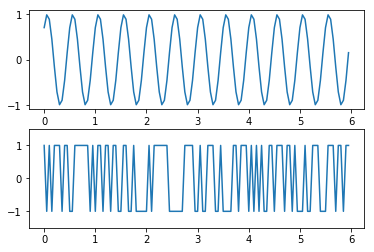

In [161]:
print (1/20)

t = np.arange(0.0, 6.0, 1/20) # 0,25 # 0.75 +50
#t[0:20] = np.pi/8
t1 = t.copy()
print (t.shape)
plt.figure()
t1 = np.cos(4 * np.pi * t - np.pi/4 )


#sig = np.cos(2 * np.pi * (np.pi/4))
"""for i in t:
    sig = np.cos(2 * np.pi * i)"""
    #print ("Sig",sig, "T",i)
"""t1[0:60] = 0
t1[100:120] = 0"""
#t1[120:140] = 0
#sig = np.cos(2 * np.pi * t)
print (t)
print (t1)
pwm = signal.square(2 * np.pi * 30 * t)#, duty=(sig + 1)/2)
plt.subplot(2, 1, 1)
plt.plot(t, t1)
plt.subplot(2, 1, 2)
plt.plot(t, pwm)
plt.ylim(-1.5, 1.5)
plt.show()

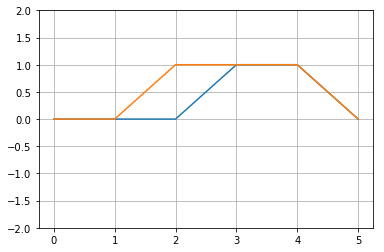

In [4]:
t = np.arange(0.0, 6.0, 1)
l = [0, 0, 0, 1, 1, 0]
l = [(0,0), (0,0), (0,1), (1,1), (1,1), (0,0)]
#plt.plot()
#plt.plot(t,signal.square(t *np.pi ))
plt.plot(t,l)
plt.grid(axis='both')
plt.ylim(-2, 2)
plt.show()



In [247]:
def NRZ(_list):
    position_x = []
    values = []
    detected = False
    for i in range(len(_list)):
        if i < len(_list)-1:
            if _list[i] != _list[i+1] :
                values.append(_list[i])
                detected = True
                position_x.append(i)      

        if (detected):
            position_x.append(i+1)
            detected= False
        elif(not detected):
            position_x.append(i)
        values.append(l[i])

    position_x += [position_x[-1]+1]
    values += [_list[-1]]
    return [position_x, values]

In [248]:
def NRZ_L(_list):    
    values, x = NRZ(_list)    
    x = np.asarray(x)
    x *= -1
    x = list(x)    
    return [values,x]

In [249]:
def plot_digital_signal(position_x,values,name):
    #plt.subplots(figsize=(11,11))
    plt.plot(position_x,values)
    plt.title(name)
    plt.grid(axis='both')
    plt.ylim(-1.5, 1.5)
    plt.xlim(0, 10)
    plt.show()

In [250]:
def NRZ_I(_list):
    positions_in_bits = list(range(len(_list)))
    position_x = []
    values = []
    actual = _list[0]
    for i in positions_in_bits:
        if _list[i] == 0:
            if actual == 0:
                position_x.append(i)
                values.append(actual)
            position_x.append(i+1)
            values.append(actual)
        elif(_list[i] == 1 and i == 0):
            position_x.append(i)
            position_x.append(i+1)
            values.append(actual)
            values.append(actual)
        
        elif(_list[i] == 1):
            if actual == 1:
                actual = -1
                
            elif actual == -1:
                actual = 1                
            else:
                actual = 1
        
                
        position_x.append(i)
        position_x.append(i+1)
        values.append(actual)
        values.append(actual)
        
    return [position_x, values]

In [251]:
def NRZ_I_2(_list):
    positions_in_bits = list(range(len(_list)))
    position_x = []
    values = []
    actual = _list[0]
    for i in positions_in_bits:
        
        if(_list[i] == 1 and i == 0):
            position_x.append(i)
            position_x.append(i+1)
            values.append(actual)
            values.append(actual)
        
        elif(_list[i] == 1):
            if actual == 1:
                actual = -1
                
            elif actual == -1:
                actual = 1                
            else:
                actual = 1
        
                
        position_x.append(i)
        position_x.append(i+1)
        values.append(actual)
        values.append(actual)
        
    return [position_x, values]

In [252]:
def Bipolar_AMI(_list):
    positions_in_bits = list(range(len(_list)))
    position_x = []
    values = []
    actual = _list[0]
    for i in positions_in_bits:
        if _list[i] == 0:
            if actual == 0:
                position_x.append(i)
                values.append(actual)
                position_x.append(i+1)
                values.append(actual)
            elif actual != 0:
                #actual == 0
                position_x.append(i)
                values.append(0)
                position_x.append(i+1)
                values.append(0)

        elif(_list[i] == 1 and i == 0):
            position_x.append(i)
            position_x.append(i+1)
            values.append(actual)
            values.append(actual)

        elif(_list[i] == 1):
            if actual == 1:
                actual = -1

            elif actual == -1:
                actual = 1                
            else:
                actual = 1

            position_x.append(i)
            position_x.append(i+1)
            values.append(actual)
            values.append(actual)
            
    return [position_x, values]


In [253]:
def Pseudoternary(_list):
    actual = 0
    positions_in_bits = list(range(len(_list)))
    position_x = []
    values = []
    if _list[0] == 0:
        actual = 1 
        
    for i in positions_in_bits:

        if(i == 0 and actual == 1):
            #print (actual)
            #break
            position_x.append(i)
            position_x.append(i+1)
            values.append(actual)
            values.append(actual) 
            #actual = -1
        elif(_list[i] == 0 and actual == 0):
                #if actual == 0:
            actual = 1
            position_x.append(i)
            position_x.append(i+1)
            values.append(actual)
            values.append(actual)

        elif(_list[i] == 0 and actual == 1):  
            actual = -1
            position_x.append(i)
            position_x.append(i+1)
            values.append(actual)
            values.append(actual)

        elif(_list[i] == 0 and actual == -1):  
            actual = 1
            position_x.append(i)
            position_x.append(i+1)
            values.append(actual)
            values.append(actual)
        
        elif(_list[i] == 1):
            position_x.append(i)
            position_x.append(i+1)
            values.append(0)
            values.append(0)
    return [position_x, values]

In [260]:
def ASK(_list):
    start = 0
    num = 500
    end = num
    freq = 1/num
    long_list = len(_list)+1
    position_x = np.arange(0.,float(long_list),freq)
    values = position_x.copy()
    values = np.cos(4 * np.pi * position_x - np.pi/2 )
    
    for i in _list:
        #print (i)
        if i == 0:
            values[start:end] = 0
            
        start += num
        end += num
    return [position_x, values]

In [261]:
def FSK(_list):
    start = 0
    num = 500
    end = num
    freq = 1/num
    long_list = len(_list)+1
    position_x = np.arange(0.,float(long_list),freq)
    values = position_x.copy()
    values1 = position_x.copy()
    values = np.cos(4 * np.pi * position_x - np.pi/2)
    values1 = np.cos(2 * np.pi * position_x - np.pi/2)
    
    for i in _list:
        if i == 0:
            #print (start,)
            values[start:end] = values1[start:end]            
            
        start += num
        end += num
    return [position_x, values]

In [262]:
def PSK(_list):
    start = 0
    num = 500
    end = num
    freq = 1/num
    long_list = len(_list)+1
    position_x = np.arange(0.,float(long_list),freq)
    values = position_x.copy()
    values1 = position_x.copy()
    values = np.cos(4 * np.pi * position_x + np.pi/2)
    values1 = np.cos(4 * np.pi * position_x - np.pi/2)
    
    for i in _list:
        if i == 0:
            values[start:end] = values1[start:end]            
            
        start += num
        end += num
    return [position_x, values]

L [0, 0, 1, 1, 0, 1, 0, 0, 0, 1]


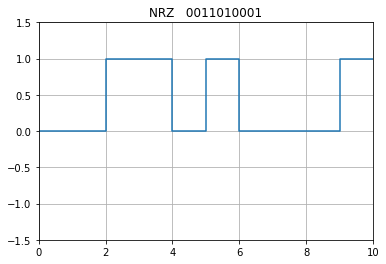

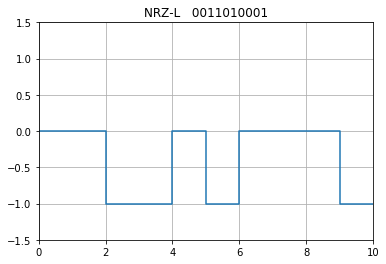

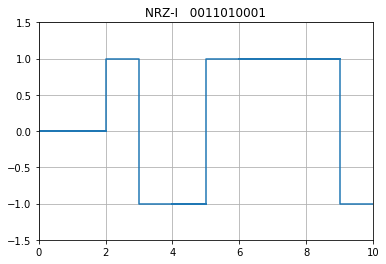

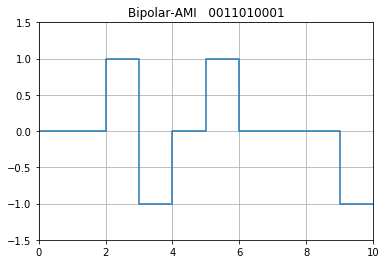

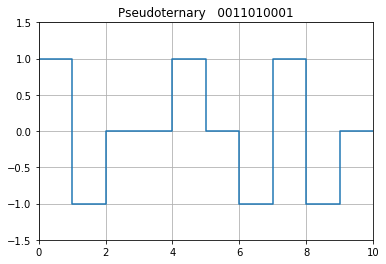

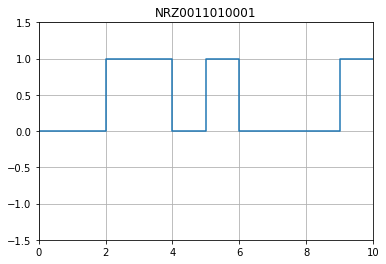

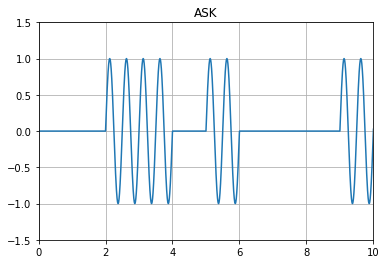

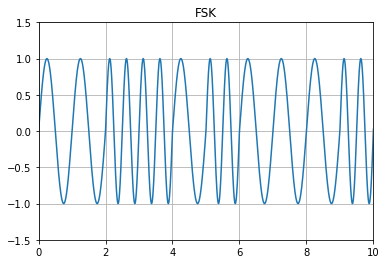

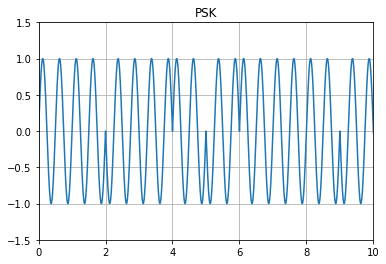

In [273]:
### (x,y)
### y
### x
import numpy as np
import matplotlib.pyplot as plt
l = []
sequence = ""
for i in range(10):
    l += [np.random.randint(2)]
    sequence += str(l[i])

print ("L",l)

position_x, values = NRZ(l)
plot_digital_signal(position_x,values,"NRZ"+"   "+sequence)

position_x, values = NRZ_L(l)
plot_digital_signal(position_x,values,"NRZ-L"+"   "+sequence)

position_x, values = NRZ_I(l)
plot_digital_signal(position_x,values,"NRZ-I"+"   "+sequence)

"""position_x, values = NRZ_I_2(l)
plot_digital_signal(position_x,values,"NRZ-I")"""

position_x, values = Bipolar_AMI(l)
plot_digital_signal(position_x,values,"Bipolar-AMI"+"   "+sequence)

position_x, values = Pseudoternary(l)
plot_digital_signal(position_x,values,"Pseudoternary"+"   "+sequence)

###Decodificacio
#Se ha desfasado la sequencia -pi/2 para obtener resultados iguales a la transparencia pero que no hace falta
position_x, values = NRZ(l)
plot_digital_signal(position_x,values,"NRZ"+"   "+sequence)

position_x, values = ASK(l)
plot_digital_signal(position_x,values,"ASK"+"   "+sequence)

position_x, values = FSK(l)
plot_digital_signal(position_x,values,"FSK"+"   "+sequence)

position_x, values = PSK(l)
plot_digital_signal(position_x,values,"PSK"+"   "+sequence)




#l = [0, 0, 0, 1, 1, 0]
#y = [0,0,0,0,1,1,1,0,0]
#x = [0,1,2,3,3,4,5,5,6]

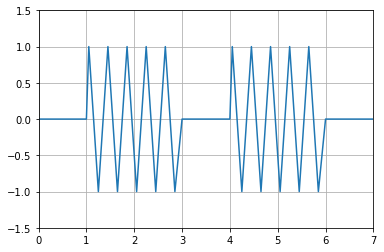

In [268]:
#ASK = A*np.cos(2*np.pi*f1) | 0

#FSK = A*np.cos(2*np.pi*f1) | A*np.cos(2*np.pi*f1)

#PSK = A*np.cos(2*np.pi*f1 + np.pi) | A*np.cos(2*np.pi*f1)



_list = [0,1,1,0,1,1,0]
#positions_in_bits = list(range(len(_list)+1))

#_list = np.asarray(_list)



#position_x = [0,1,1,2,2,3,3,4,4,5,5,6,6,7] 
#values = [1,1,0,0,0,0,-1,-1,0,0,0,0,1,1]
#

"""position_x = []
values = []"""
position_x = [0,1,1.05,1.25,1.45,1.65,1.85,2.05,2.25,2.45,2.65,2.85,3,4,4.05
              ,4.25,4.45,4.65,4.85,5.05,5.25,5.45,5.65,5.85,6,7]#26
values = [0,0,1,-1,1,-1,1,-1,1,-1,1,-1,0,0,1,-1,1,-1,1,-1,1,-1,1,-1,0,0]#26




plt.plot(position_x,values)
#plt.plot([1,2,3,4,5,6],[0,1,0,-1,0,1])
#plt.title(name)
plt.grid(axis='both')
plt.ylim(-1.5, 1.5)
plt.xlim(0, 7)
plt.show()
#L = [0,1,1,0,1,1,0]
#position_x = [0,1,1,2,2,3,4,4,5,5,6,7]
#values = [0,0,1,1,-1,-1,-1,1,1,-1,-1,-1]